In [1]:
# Import Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

df = pd.read_csv("weather_data.csv")

In [3]:
df.shape

(161, 10)

In [4]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S


In [5]:
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [7]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [8]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,161.000000,123.000000,154.000000,161.000000,161.000000,161.0,161.000000
mean,80.391304,41.837398,185.642857,9.903106,15.950311,2025.0,77.739130
std,46.121738,32.674343,88.237623,3.503274,9.066285,0.0,9.397155
min,1.000000,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000
25%,41.000000,18.000000,121.750000,7.400000,8.000000,2025.0,72.000000
50%,80.000000,31.000000,195.500000,9.700000,16.000000,2025.0,78.000000
75%,120.000000,62.000000,257.500000,11.500000,24.000000,2025.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000


In [9]:
# Data Cleaning & Preparation

df.loc[df.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [10]:
# Remove duplicate rows

df = df.drop_duplicates(ignore_index = True)

In [11]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2025,67,C
154,155,30.0,193.0,6.9,70,9,26,2025,70,PS
155,156,NaN,145.0,13.2,77,9,27,2025,77,S
156,157,14.0,191.0,14.3,75,9,28,2025,75,S


In [12]:
# Drop irrelevant columns

df = df.drop(["Unnamed: 0","Temp C"], axis = 1)

In [13]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [14]:
# Rename columns

df = df.rename({"Solar.R": "Solar"}, axis =1)

In [15]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [16]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [17]:
mean = df["Solar"].mean().round()
mean

np.float64(185.0)

In [18]:
# Handle missing values
     
df["Solar"] = df["Solar"].fillna(mean)

In [19]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [20]:
df["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [21]:
df["Month"].replace({"May": '5'}).unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [22]:
# Standardize Month column
    
df["Month"] = df["Month"].replace({"May": '5'})

In [23]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [24]:
# Create Date column

df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [25]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


<Axes: >

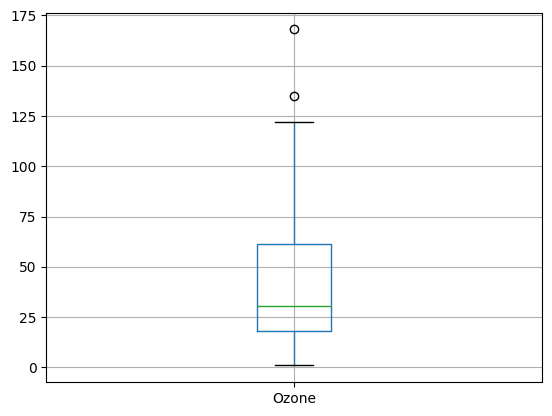

In [26]:
# Outlier Detection

df.boxplot(column="Ozone")

In [27]:
df["Ozone"].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [28]:
IQR = 61.500000 - 18.000000
max_limit = 61.500000 + 1.5 * IQR
max_limit

126.75

In [29]:
df[df["Ozone"]>max_limit]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
116,168.0,238.0,3.4,8,25,2025,81,PS,2025-08-25


In [30]:
df.dtypes

Ozone             float64
Solar             float64
Wind              float64
Month              object
Day                 int64
Year                int64
Temp                int64
Weather            object
Date       datetime64[ns]
dtype: object

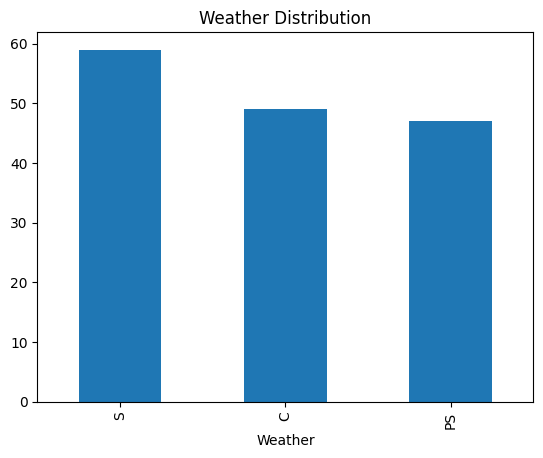

In [31]:
# Categorical Features

df["Weather"].value_counts().plot(kind = 'bar')
plt.title("Weather Distribution")
plt.show()

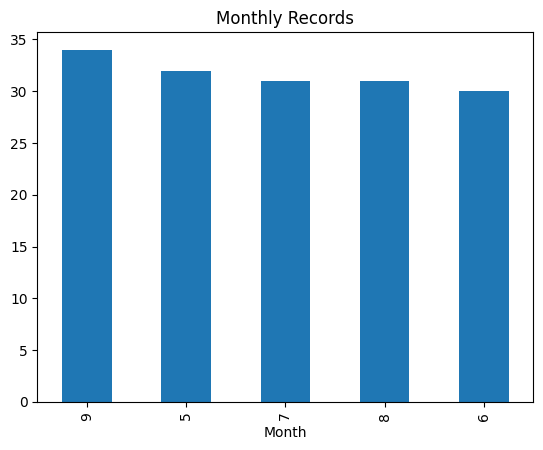

In [32]:
df["Month"].value_counts().plot(kind = 'bar')
plt.title("Monthly Records")
plt.show()

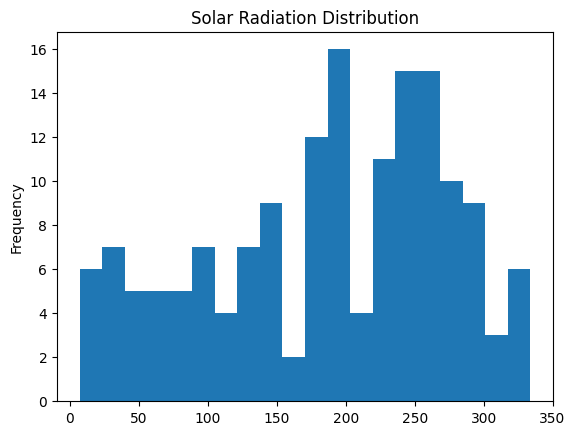

In [33]:
# Numerical Features

df["Solar"].plot(kind = 'hist', bins = 20)
plt.title("Solar Radiation Distribution")
plt.show()

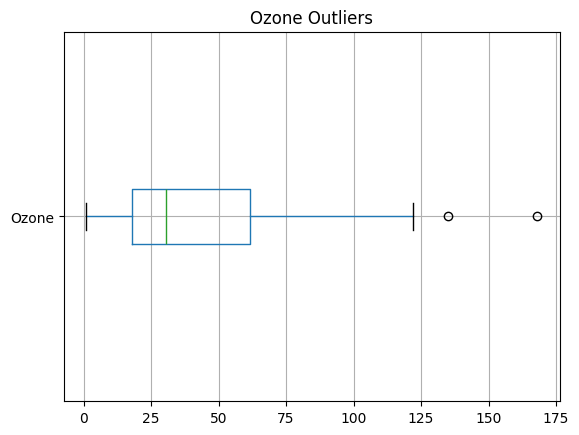

In [34]:
df.boxplot(column = "Ozone", vert=False)
plt.title("Ozone Outliers")
plt.show()

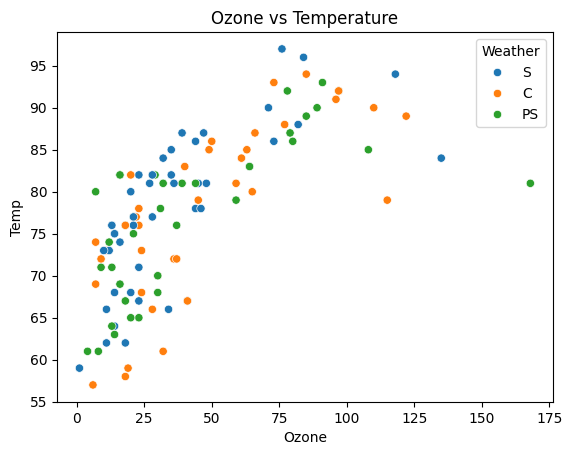

In [35]:
# Scatter plot

sns.scatterplot(data = df, x = "Ozone", y = "Temp", hue = "Weather")
plt.title("Ozone vs Temperature")
plt.show()

In [36]:
# Correlation heatmap

df1 = df.drop(["Year"], axis=1)
df1

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,56,S,2025-05-05
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,75,S,2025-09-28


In [37]:
df1.corr(numeric_only=True)

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.344013,-0.593530,-0.035055,0.694098
Solar,0.344013,1.000000,-0.055036,-0.149447,0.260577
Wind,-0.593530,-0.055036,1.000000,0.040151,-0.441247
Day,-0.035055,-0.149447,0.040151,1.000000,-0.124538
Temp,0.694098,0.260577,-0.441247,-0.124538,1.000000


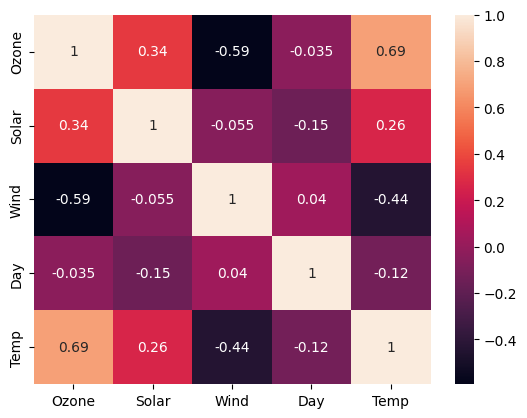

In [38]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)
plt.show()

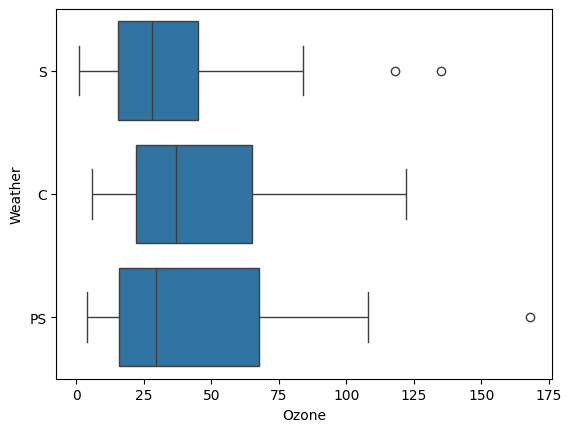

In [39]:
# Boxplot

sns.boxplot(data = df, x = "Ozone", y = "Weather")
plt.show()

In [40]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


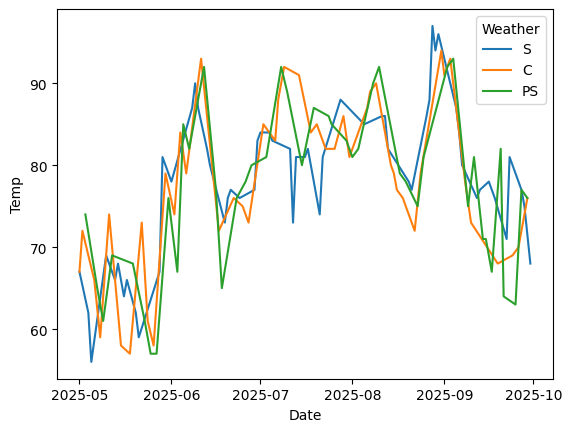

In [41]:
# Time Series Analysis

sns.lineplot(data = df, x = "Date", y = "Temp", hue = "Weather")
plt.show()

In [42]:
# Grouped Analysis

df.groupby("Weather")[["Ozone", "Wind"]].mean(numeric_only=True)

,Ozone,Wind
Weather,,
C,46.162162,9.783673
PS,42.194444,9.908511
S,36.909091,10.093220


In [43]:
df.groupby("Weather")[["Ozone", "Wind"]].describe()

Ozone                                                       Wind  \
        count       mean        std  min   25%   50%    75%    max count   
Weather                                                                    
C        37.0  46.162162  32.593041  6.0  22.0  37.0  65.00  122.0  49.0   
PS       36.0  42.194444  37.225045  4.0  16.0  29.5  67.50  168.0  47.0   
S        44.0  36.909091  28.789386  1.0  15.5  28.0  45.25  135.0  59.0   

                                                           
              mean       std  min  25%   50%    75%   max  
Weather                                                    
C         9.783673  3.869450  1.7  7.4   9.7  11.50  20.7  
PS        9.908511  3.612348  3.4  7.4   9.2  12.05  20.1  
S        10.093220  3.177880  2.3  7.4  10.3  11.75  15.5

In [44]:
# Business Questions

# Average values for Sunny weather

df[df["Weather"] == "S"].mean(numeric_only=True)

Ozone      36.909091
Solar     193.050847
Wind       10.093220
Day        16.661017
Year     2025.000000
Temp       78.067797
dtype: float64

In [45]:
# Average temperature in June when weather is Cloudy

df[(df["Month"] == "6") & (df["Weather"] == "C")]["Temp"].mean()

np.float64(78.33333333333333)

In [46]:
# Maximum wind speed in July when weather is Sunny

df[(df["Month"] == "7") & (df["Weather"] == "S")]["Wind"].max()

np.float64(14.9)